In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import TensorBoard
import os
import numpy as np
import pickle
import pandas as pd

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from cifar_model_pipeline import cifar10_model_pipeline_func, plot_model_accuracy

In [2]:
#Load the data into train and test
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


EDA

In [3]:
#Count the number of classes
num_classes = len(np.unique(y_train))
print('Number of classes:', num_classes)

Number of classes: 10


In [4]:
#Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [5]:
#Convert the labels to categorical
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


Data Augementation scenarios

In [6]:
from tensorflow.image import random_crop, flip_left_right, flip_up_down, random_flip_up_down, random_flip_left_right, rot90


In [7]:
#Setup 1 
#Perform random crop on data

x_train_crop = random_crop(x_train, [50000,16, 16, 3])

2022-06-24 20:18:06.165670: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-24 20:18:06.165823: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [8]:

x_train_crop = np.array(x_train_crop)

In [9]:
#Model on the cropped data
crop_model = cifar10_model_pipeline_func(x_train_crop, y_train, num_classes = 10, epochs = 2, batch_size = 32, lr = 0.001, optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Epoch 1/2


2022-06-24 20:18:18.347903: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


   1/1250 [..............................] - ETA: 8:23 - loss: 2.3206 - accuracy: 0.0938

2022-06-24 20:18:18.600969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1247/1250 [============================>.] - ETA: 0s - loss: 1.8966 - accuracy: 0.2868

2022-06-24 20:18:32.294691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1250/1250 [==============================] - 16s 12ms/step - loss: 1.8962 - accuracy: 0.2869 - val_loss: 1.6205 - val_accuracy: 0.4081
Epoch 2/2
1250/1250 [==============================] - 15s 12ms/step - loss: 1.5786 - accuracy: 0.4217 - val_loss: 1.4513 - val_accuracy: 0.4757


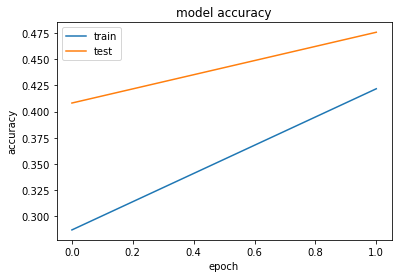

<Figure size 432x288 with 0 Axes>

In [10]:
plot_model_accuracy(crop_model.history)

Model training and evaluation

In [11]:
my_model = cifar10_model_pipeline_func(x_train, y_train, num_classes = num_classes, epochs = 5, batch_size = 32, lr = 0.001, optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Epoch 1/5
   4/1250 [..............................] - ETA: 20s - loss: 2.3402 - accuracy: 0.0703 

2022-06-24 20:19:02.424190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1250/1250 [==============================] - ETA: 0s - loss: 1.5646 - accuracy: 0.4264

2022-06-24 20:19:19.793351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1250/1250 [==============================] - 20s 16ms/step - loss: 1.5646 - accuracy: 0.4264 - val_loss: 1.1787 - val_accuracy: 0.5770
Epoch 2/5
1250/1250 [==============================] - 19s 15ms/step - loss: 1.1439 - accuracy: 0.5921 - val_loss: 0.9874 - val_accuracy: 0.6494
Epoch 3/5
1250/1250 [==============================] - 19s 15ms/step - loss: 0.9860 - accuracy: 0.6515 - val_loss: 0.9144 - val_accuracy: 0.6763
Epoch 4/5
1250/1250 [==============================] - 19s 15ms/step - loss: 0.8868 - accuracy: 0.6856 - val_loss: 0.8561 - val_accuracy: 0.6947
Epoch 5/5
1250/1250 [==============================] - 19s 15ms/step - loss: 0.8137 - accuracy: 0.7143 - val_loss: 0.7939 - val_accuracy: 0.7169


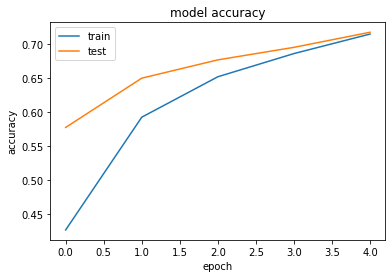

<Figure size 432x288 with 0 Axes>

In [12]:
plot_model_accuracy(my_model.history)

Simple model architecture

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                    input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


model.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 3

2022-06-02 12:51:50.609644: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-02 12:51:50.609787: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train,
            batch_size=32,
            epochs=10,
            validation_data=(x_test, y_test))            

Epoch 1/10


2022-06-02 12:51:51.540887: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-02 12:51:51.949401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.4945 - accuracy: 0.4548

2022-06-02 12:52:23.927982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 35s 22ms/step - loss: 1.4945 - accuracy: 0.4548 - val_loss: 1.1525 - val_accuracy: 0.5914
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0990 - accuracy: 0.6075 - val_loss: 0.9699 - val_accuracy: 0.6500
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9631 - accuracy: 0.6591 - val_loss: 0.9369 - val_accuracy: 0.6762
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8648 - accuracy: 0.6960 - val_loss: 0.8069 - val_accuracy: 0.7224
Epoch 5/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.7995 - accuracy: 0.7187 - val_loss: 0.7613 - val_accuracy: 0.7349
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7439 - accuracy: 0.7384 - val_loss: 0.7720 - val_accuracy: 0.7310
Epoch 7/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7043 - accuracy: 0.7524 - val_loss: 0.6971 - val_accura

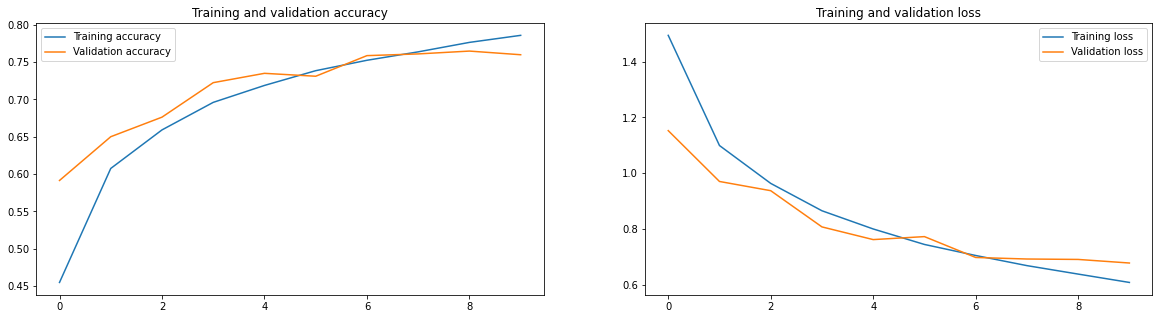

In [15]:
#Training and validation curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
ax1.plot(model.history.history['accuracy'], label='Training accuracy')
ax1.plot(model.history.history['val_accuracy'], label='Validation accuracy')
ax1.set_title('Training and validation accuracy')
ax1.legend()
ax2.plot(model.history.history['loss'], label='Training loss')
ax2.plot(model.history.history['val_loss'], label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()
plt.show()
